# Audio Data Analysis

## Introduction to the Audio Dataset
The dataset contains audio files, presumably of spoken digits. We'll utilize various audio processing techniques and visualizations to understand the data and later build a classifier to recognize these spoken digits.

## Data Loading and Initial Exploration
### Load Audio Data
Load an example audio file and display its waveform.

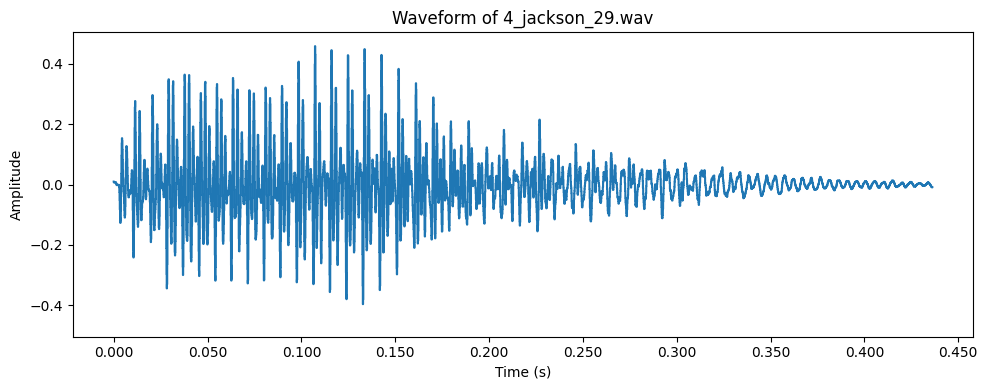

In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

dataset_path = 'data'
files = [f for f in os.listdir(dataset_path) if f.endswith('.wav')]
file_path = os.path.join(dataset_path, files[0])
y, sr = librosa.load(file_path, sr=None)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform of {files[0]}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## Audio Feature Visualization
### 1. Mel Spectrogram
Visualize the mel spectrogram of the audio file, providing insights into frequency patterns.



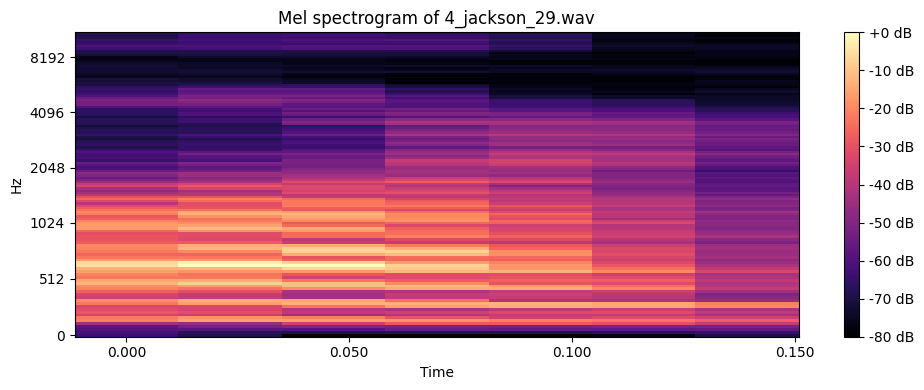

In [4]:
import numpy as np

mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel spectrogram of {files[0]}')
plt.tight_layout()
plt.show()

### 2. Chromagram
Showcase the chromagram to capture the energy distribution over pitch classes

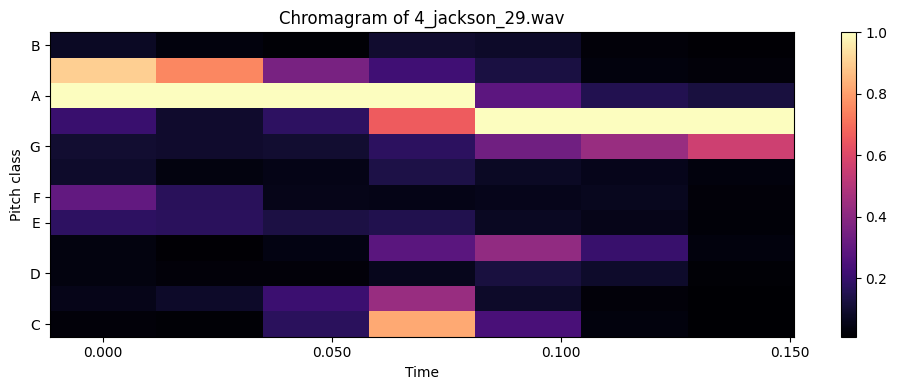

In [5]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title(f'Chromagram of {files[0]}')
plt.tight_layout()
plt.show()

### 3. Spectral Contrast
Visualize the spectral contrast of the audio, highlighting the difference in amplitude between peaks and valleys in sound frequencies

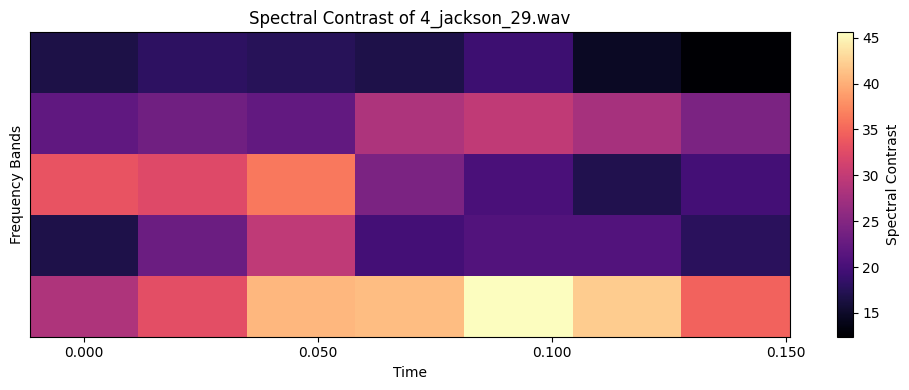

In [6]:
spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=4, fmin=400.0)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec_contrast, x_axis='time')
plt.colorbar(label='Spectral Contrast')
plt.ylabel('Frequency Bands')
plt.title(f'Spectral Contrast of {files[0]}')
plt.tight_layout()
plt.show()

## Model Building, Training, and Evaluation
### Feature Extraction
Extract MFCC (Mel-frequency cepstral coefficients) features from the audio data to be used for classification.

In [7]:
import numpy as np

features = []
labels = []

for file in files:
    y, sr = librosa.load(os.path.join(dataset_path, file), sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    features.append(np.mean(mfccs, axis=1))
    labels.append(int(file[0]))

X = np.array(features)
y = np.array(labels)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1866
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1824
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1560
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1288
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1962
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1531
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py

### Model Training and Testing
Train a RandomForest classifier on the extracted features and evaluate its performance.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        55
           1       0.94      0.99      0.96        67
           2       0.86      0.83      0.85        53
           3       0.87      0.92      0.89        60
           4       1.00      1.00      1.00        37
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       1.00      0.71      0.83         7
           8       0.00      0.00      0.00         4

    accuracy                           0.90       288
   macro avg       0.61      0.60      0.60       288
weighted avg       0.87      0.90      0.88       288



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
